In [1]:
import numpy as np
import librosa 
import sklearn
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import music21
import mido

In [2]:
note_info = []
x, sr = librosa.load("../../data/five.wav")

In [3]:
len(x)/sr

11.359909297052154

In [3]:
ipd.Audio(x,rate=sr)

In [4]:
last_onset = 0

In [15]:
segment = 3
curr_x = x[0+(segment-1)*sr:sr*segment]



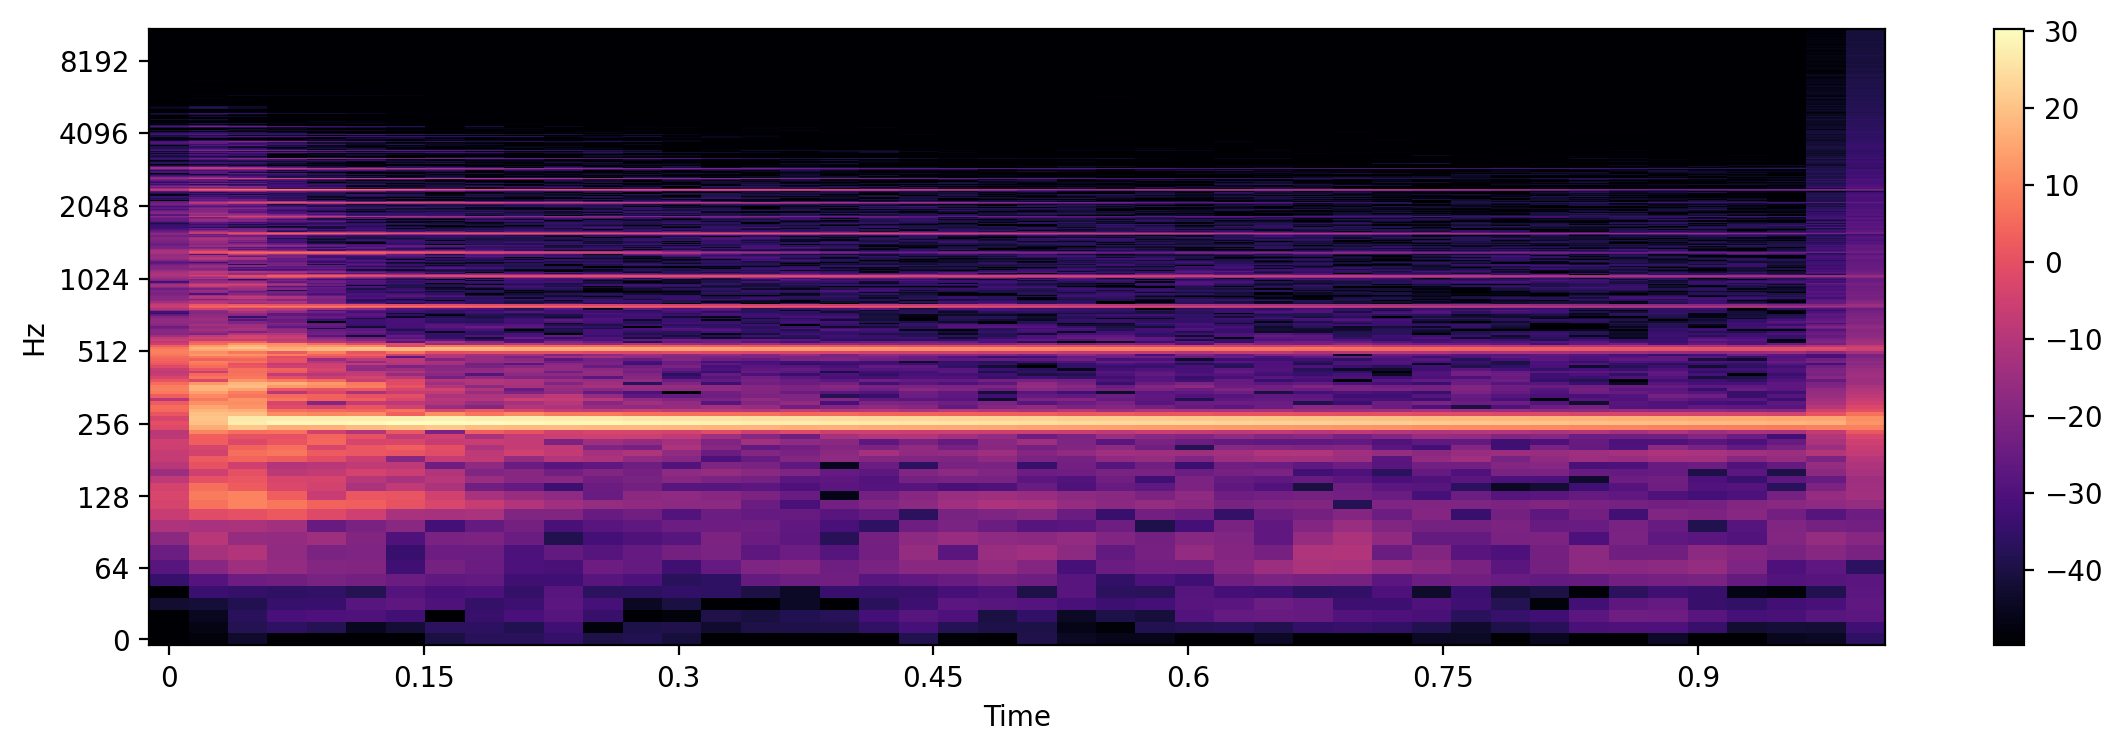

In [17]:
S = librosa.stft(curr_x)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [7]:
onset_frames = librosa.onset.onset_detect(curr_x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)

/var/folders/pt/c3pppqgj6rx6ydqlk9zj4s1w0000gn/T/ipykernel_20827/4121327115.py:1: FutureWarning: Pass y=[3.9768118e-05 9.6509284e-05 1.2995867e-04 ... 4.5972327e-03 4.6685888e-03
 5.0186021e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.onset.onset_detect(curr_x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)


In [8]:
hop_length = 512
tempo, beats = librosa.beat.beat_track(y=x,sr=sr)
print(tempo)
tempo=int(2*round(tempo/2))
mm = music21.tempo.MetronomeMark(referent='quarter', number=tempo)
print(mm)

29.700969827586206
<music21.tempo.MetronomeMark largamente Quarter=30>


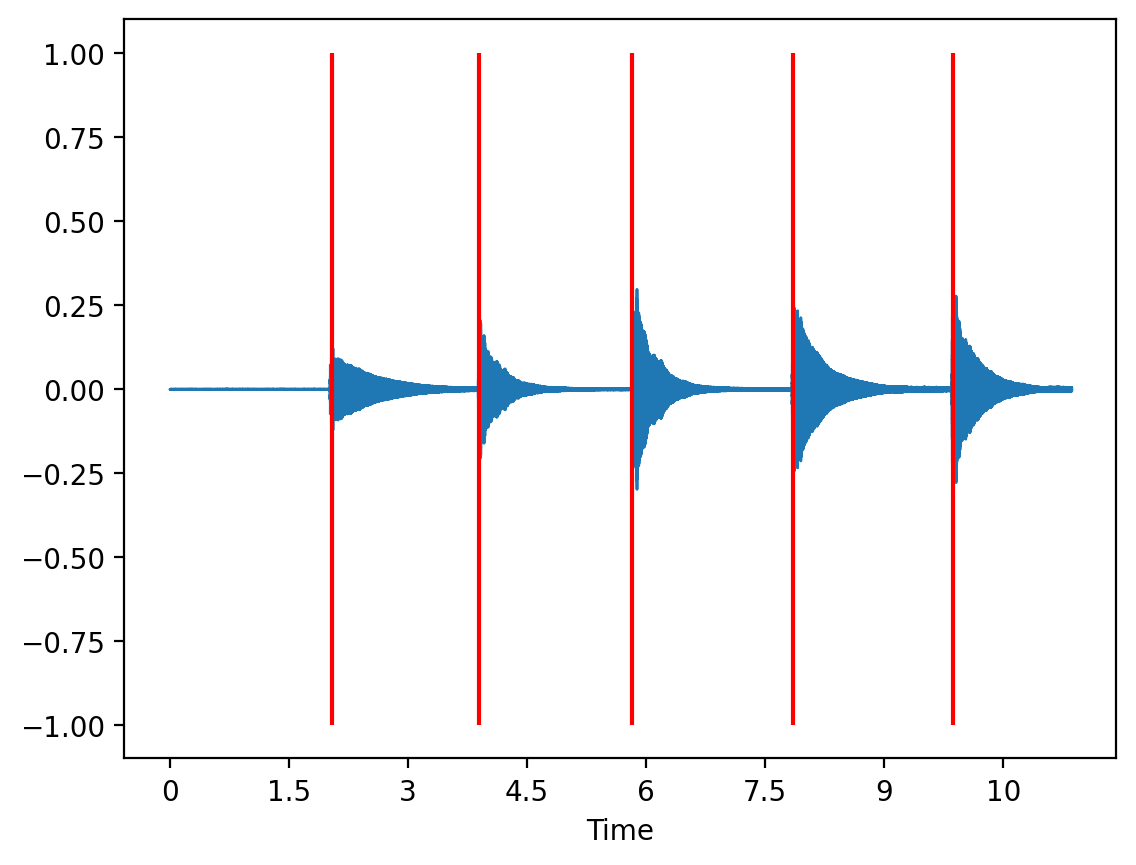

In [9]:
librosa.display.waveshow(curr_x, sr=sr)
plt.vlines(onset_times, -1, 1, color='r')

In [10]:
ipd.Audio(curr_x,rate=sr)

In [11]:
cps = len(onset_times)
X, X_phase = librosa.magphase(S)
W, H = librosa.decompose.decompose(X,n_components=cps, sort=True)

258.1463414634146
290.4146341463415
333.4390243902439
344.1951219512195
387.219512195122


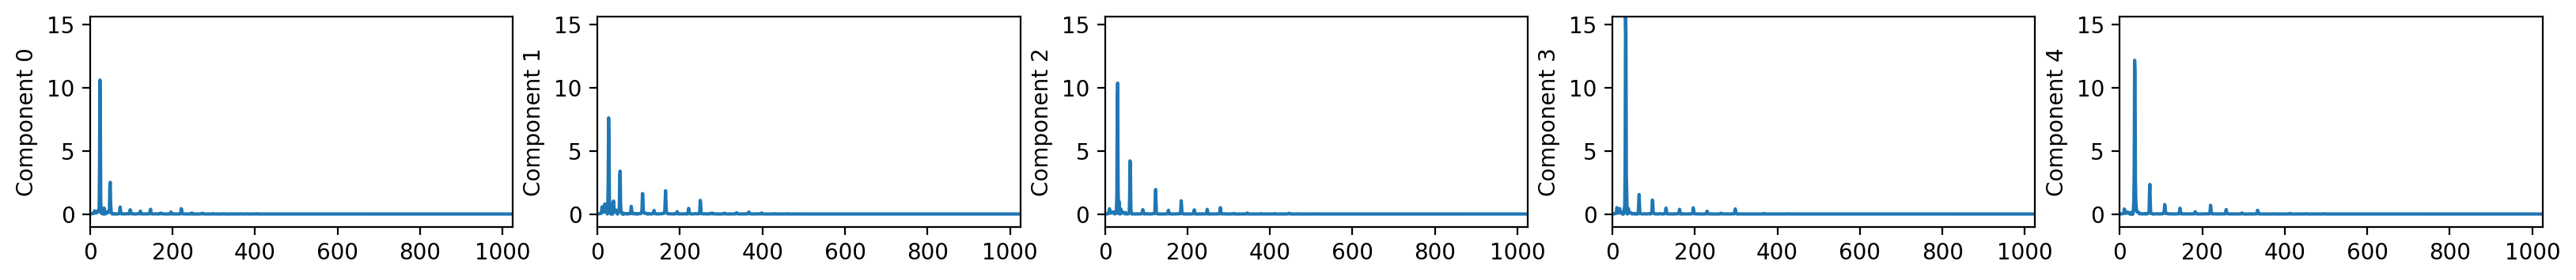

In [12]:
plt.figure(figsize=(20, 10))
for n in range(cps):
    plt.subplot(5, 5, n+1)
    plt.plot(W[:,n])
    plt.ylim(-1, W.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)
    print(np.argmax(W[:,n]) * (sr/2)/S.shape[0])

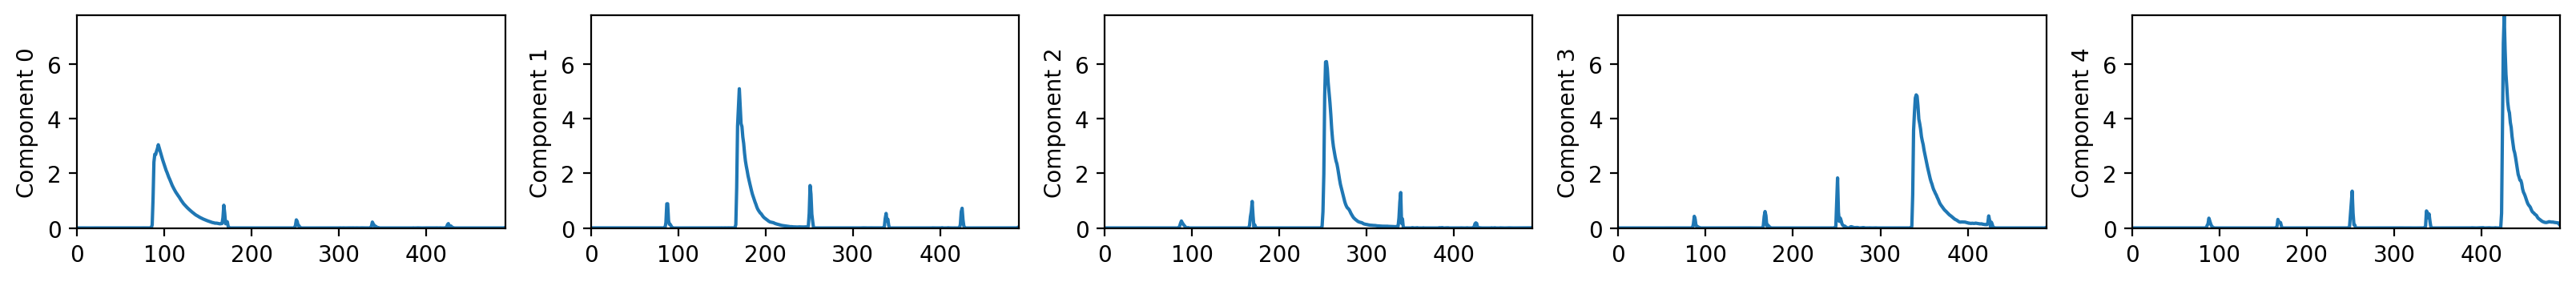

In [13]:
plt.figure(figsize=(20, 10))
for n in range(cps):
    plt.subplot(5, 5, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

In [14]:
for n in range(cps):
    spectral = W[:,n]
    temporal = H[n]

    onsets_ = librosa.util.peak_pick(temporal,pre_max = 6, post_max=6,pre_avg=50, post_avg=50,delta=temporal.max()/2,wait=0)

    n = librosa.hz_to_midi(np.argmax(spectral) * (sr/2)/S.shape[0])
    for o in onsets_:
        note_info += [[(segment-1)+round(o/S.shape[1],3),round(n)]]



    #print(librosa.hz_to_note(np.argmax(spectral) *(sr/2)/S.shape[0] ))  #can detect half the sampling frequency
    #print(onsets_ * 1/S.shape[1])

NameError: name 'segment' is not defined

In [ ]:
note_info = sorted(note_info)

[[0.682, 56, 0.02], [0.705, 38, 0.14], [0.841, 46, 0.3], [1.409, 46, 1.3, 2.3, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52], [3.932, 62, 2.59], [4.0, 63, 0.02], [4.023, 62, 0.02], [4.045, 61, 0.0], [4.045, 62, 0.0], [4.045, 86, 0.02], [4.068, 86, 0.16], [4.227, 62, 0.11], [4.341, 86, 0.77], [5.864, 64, 4.59], [6.0, 63, 0.0], [6.0, 63, 0.02], [6.023, 64, 0.0], [6.023, 88, 0.02], [6.045, 65, 0.0], [6.045, 88, 0.02], [6.068, 65, 0.05], [6.114, 76, 0.07], [6.182, 65, 0.04], [6.227, 64, 0.05], [6.273, 64, 0.11], [6.386, 64, 0.05], [6.432, 64, 0.61], [7.886, 65, 0.11], [8.0, 66, 0.02], [8.023, 64, 0.0], [8.023, 66, 0.0], [8.023, 77, 0.02], [8.045, 64, 0.0], [8.045, 65, 0.0], [8.045, 77, 0.05], [8.091, 65, 0.04], [8.136, 64, 0.0], [8.136, 77, 0.16], [8.295, 64, 0.05], [8.341, 65, 0.16], [8.5, 65, 0.46], [8.955, 64, 0.5], [9.864, 67, 8.59]]


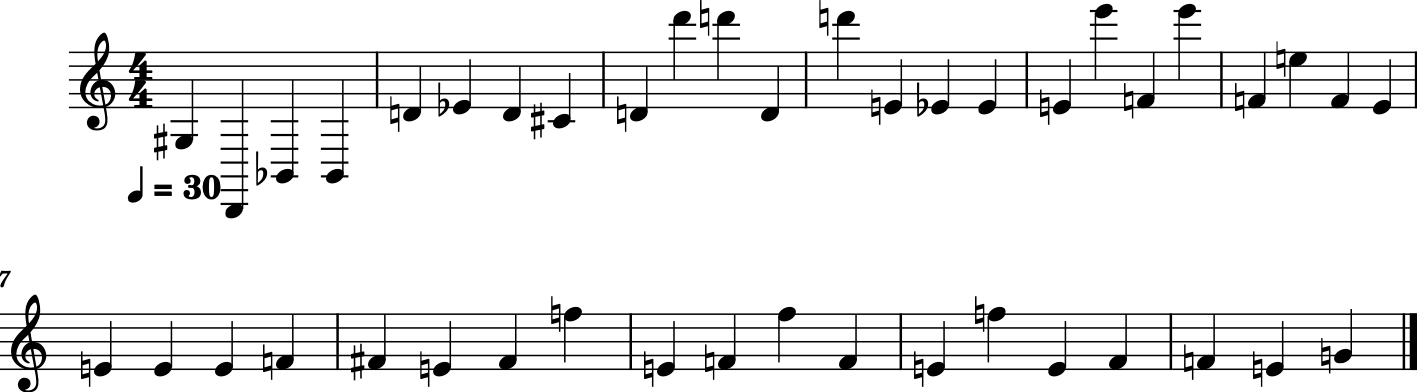

In [ ]:
for i in range(len(note_info)-1):
    if(len(note_info[i]) == 3): # if it is already processed skip
        continue
    duration = note_info[i+1][0] - note_info[i][0] 
    note_info[i] += [round(duration,2)]
    last_onset = note_info[i][0]
note_info[len(note_info)-1] += [round(segment-last_onset,2)]
print(note_info)

s = music21.stream.Stream()
s.append(mm)
for i in note_info:
    n = music21.note.Note(i[1]) 
    #n.duration.quarterLength = i[2]
    s.append(n)
s.show()
#s.write('midi', fp='my_midi_file.mid')

In [ ]:
#mid = mido.MidiFile()
#track = mido.MidiTrack()
#tempo = round(tempo)
#mid.tracks.append(track)

#for i in note_info:
    #end_time = np.abs(i[0]) + np.abs(i[2])
    #print(round(end_time,2))

    #on = mido.Message('note_off', time=int(np.abs(i[0])*tempo), note=i[1], velocity=64)

    #track.append(on)

    #off = mido.Message('note_off', time=int(end_time*tempo),note=i[1],velocity=64)

    #track.append(off)

#mid.save('drum.mid')